In [1]:
from src import *

2023-06-29 20:17:41.559929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
map = Map(restaurant_array=[2,6,2], grid_size=100, randseed=25)
agent = DDQNAgent(map)

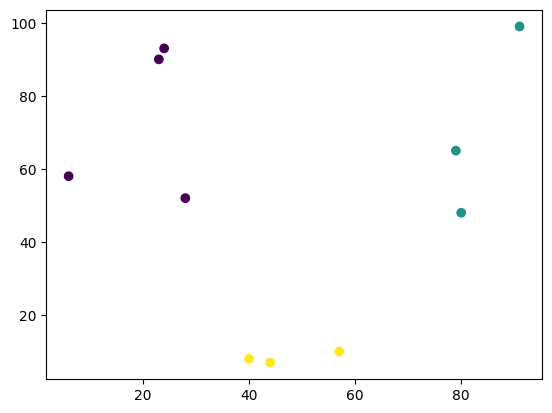

In [5]:
map.display_map_clusters()

In [7]:
rewards = agent.train(episodes=2, batch_size=8, epsilon=0.5, epsilon_decay=0.5)

[[0], [0], [0], [0], [0], [0], [0], [0], [0]]
uses: 0, actions: 0, reward: 0.00, e: 0.500, t: 3.0447s
uses: 1, actions: 76, reward: -5564.75, e: 0.500, t: 7.2667s
uses: 2, actions: 92, reward: -6976.08, e: 0.500, t: 8.1777s
uses: 3, actions: 3, reward: -213.77, e: 0.500, t: 3.1957s
uses: 4, actions: 45, reward: -4117.78, e: 0.500, t: 6.5964s
uses: 4, actions: 0, reward: 0.00, e: 0.500, t: 2.8426s
uses: 5, actions: 25, reward: -1703.69, e: 0.500, t: 4.4123s
uses: 6, actions: 9, reward: -998.00, e: 0.500, t: 3.3687s
uses: 6, actions: 0, reward: 0.00, e: 0.500, t: 2.8985s
uses: 6, actions: 0, reward: 0.00, e: 0.500, t: 2.9300s
uses: 6, actions: 0, reward: 0.00, e: 0.500, t: 2.9981s
uses: 7, actions: 7, reward: -1663.39, e: 0.500, t: 3.2004s
uses: 8, actions: 21, reward: -3386.84, e: 0.500, t: 4.3703s
uses: 9, actions: 36, reward: -3598.54, e: 0.500, t: 4.9358s
uses: 10, actions: 56, reward: -5926.00, e: 0.500, t: 6.1494s
uses: 11, actions: 27, reward: -3256.69, e: 0.500, t: 4.3823s
uses: 

In [6]:
agent.load("model_25.h5")

In [7]:
agent.test()

[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]: C_1 -> C_2, R: -10
[STATE]:  [[0], [0], [0], [0], [3], [0], [0], [3], [0]]
[ACTION]:

KeyboardInterrupt: 